# Problem Statement


---



# Loading the dataset from kaggle

In [3]:
import kagglehub
path = kagglehub.dataset_download("jeffheaton/iris-computer-vision")

100%|██████████| 5.33M/5.33M [00:00<00:00, 6.40MB/s]

Extracting files...


# Importing the dependencies

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Making the path of data

In [5]:
path

'/root/.cache/kagglehub/datasets/jeffheaton/iris-computer-vision/versions/1'

In [6]:
# printing the classes of paths
import os
os.listdir(path)

['iris-virginica', 'iris-versicolour', 'iris-setosa']

In [7]:
classes = ['iris-setosa', 'iris-versicolour', 'iris-virginica']
for cls in classes:
    cls_path = os.path.join(path, cls)
    images = os.listdir(cls_path)
    print(cls, "→", len(images), "images")


iris-setosa → 67 images
iris-versicolour → 269 images
iris-virginica → 85 images


In [8]:
# storing the image in each path
iris_setosa_path = os.path.join(path, 'iris-setosa')
iris_versicolour_path = os.path.join(path, 'iris-versicolour')
iris_virginica_path = os.path.join(path, 'iris-virginica')


In [9]:
#printing the first five images
print("iris-setosa:")
for img in os.listdir(iris_setosa_path)[:5]:
    print(img)

print("\niris-versicolour:")
for img in os.listdir(iris_versicolour_path)[:5]:
    print(img)

print("\niris-virginica:")
for img in os.listdir(iris_virginica_path)[:5]:
    print(img)

iris-setosa:
iris-7b181d378efb838ebe77df6b8d93ca936b575c2a230606d4b330cbb203e3e32f.jpg
iris-29c3861c8962dd41a2b20d6a13299c35e892c0b59487fe3e5bcc513645d860ab.jpg
iris-e437a7c7ad2bbac87fef3666b40c4de1251b9c5f595183eda90a8d9b1ef5b188.jpg
iris-0797945218a97d6e5251b4758a2ba1b418cbd52ce4ef46a3239e4b939bd9807b.jpg
iris-8c216e1acff39be76d6133e1f549d138bf63359fa0da01417e681842210ea262.jpg

iris-versicolour:
iris-590e7f5b8f4de94e4b82760919abd9684ec909d9f65691bed8e8f850010ac775.jpg
iris-432026d8501abcd495bd98937a82213da97fca410af1c46889eabbcf2fd1b589.jpg
iris-1b0b5aabd59e4c6ed1ceb54e57534d76f2f3f97e0a81800ff7ed901c35a424ab.jpg
iris-14cbed88b0d2a929477bdf1299724f22d782e90f29ce55531f4a3d8608f7d926.jpg
iris-fc4b0cc65387ff78471659d14a78f0309a76f4c3ec641b871e40b40424255097.jpg

iris-virginica:
iris-eba0c546e9b7b3d92f0b7eb98b2914810912990789479838807993d13787a2d9.jpg
iris-08c7a0e53ee1de193062d7bf86a21adec67b9115fd6099f1b2d2ee728a936002.jpg
iris-49474410fc2aaaaa011876b6cebdefad22fda03d6ff11608c7c931e00d

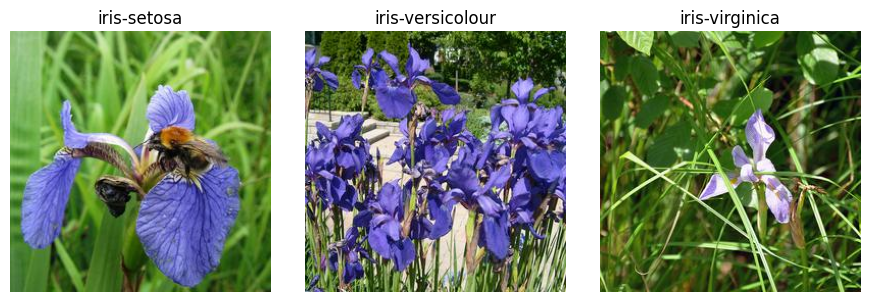

In [10]:

paths = [
    ("iris-setosa", iris_setosa_path),
    ("iris-versicolour", iris_versicolour_path),
    ("iris-virginica", iris_virginica_path),
]

plt.figure(figsize=(9, 3))

for i, (label, folder_path) in enumerate(paths, 1):
    img_name = sorted(os.listdir(folder_path))[0]
    img_path = os.path.join(folder_path, img_name)

    img = Image.open(img_path)

    plt.subplot(1, 3, i)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Creating the class of the data (three class)
0 for Setosa.

1 for Versicolour.

2 for Virginica.

In [11]:
# each lenth of the flower
num_setosa = len(os.listdir(iris_setosa_path))
num_versicolour = len(os.listdir(iris_versicolour_path))
num_virginica = len(os.listdir(iris_virginica_path))


In [12]:
#creating the label
setosa_labels = [0] * num_setosa
versicolour_labels = [1] * num_versicolour
virginica_labels = [2] * num_virginica


In [13]:
print(setosa_labels[:5])
print(versicolour_labels[:5])
print(virginica_labels[:5])


[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [14]:
labels = setosa_labels + versicolour_labels + virginica_labels


In [15]:
print(labels[:5])     # first few labels
print(labels[-5:])    # last few labels
print(len(labels))    # total images


[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]
421


# Image processing

In [16]:
#checking the minimum size of image
min_width = float("inf")
min_height = float("inf")
min_image_path = None

all_class_paths = [
    iris_setosa_path,
    iris_versicolour_path,
    iris_virginica_path
]

for class_path in all_class_paths:
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            with Image.open(img_path) as img:
                width, height = img.size

                if width < min_width or height < min_height:
                    min_width = min(min_width, width)
                    min_height = min(min_height, height)
                    min_image_path = img_path
        except:
            pass  # skip unreadable files

print("Minimum width :", min_width)
print("Minimum height:", min_height)
print("Image with smallest dimension:", min_image_path)

Minimum width : 256
Minimum height: 256
Image with smallest dimension: /root/.cache/kagglehub/datasets/jeffheaton/iris-computer-vision/versions/1/iris-setosa/iris-7b181d378efb838ebe77df6b8d93ca936b575c2a230606d4b330cbb203e3e32f.jpg


In [17]:
data = []
labels = []

# Setosa
for img_file in os.listdir(iris_setosa_path):
    image = Image.open(os.path.join(iris_setosa_path, img_file))
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)

    data.append(image)
    labels.append(0)

# Versicolour
for img_file in os.listdir(iris_versicolour_path):
    image = Image.open(os.path.join(iris_versicolour_path, img_file))
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)

    data.append(image)
    labels.append(1)

# Virginica
for img_file in os.listdir(iris_virginica_path):
    image = Image.open(os.path.join(iris_virginica_path, img_file))
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)

    data.append(image)
    labels.append(2)


In [18]:
type(data)

list

In [19]:
len(data)

421

In [20]:
type(labels)

list

In [21]:
len(labels)

421

array([[[107, 178,   1],
        [ 89, 163,   8],
        [ 96, 172,  47],
        ...,
        [147, 227,  91],
        [145, 224,  89],
        [153, 231,  96]],

       [[119, 184,  12],
        [108, 176,  27],
        [111, 183,  59],
        ...,
        [153, 229,  95],
        [148, 223,  90],
        [152, 227,  93]],

       [[113, 169,  10],
        [116, 176,  35],
        [122, 188,  66],
        ...,
        [140, 209,  78],
        [139, 205,  78],
        [144, 209,  82]],

       ...,

       [[ 68,  82,  28],
        [ 44,  60,  12],
        [ 16,  32,   0],
        ...,
        [ 71, 140,  59],
        [ 72, 141,  59],
        [ 69, 139,  55]],

       [[ 25,  43,   0],
        [ 46,  66,   0],
        [ 57,  79,   4],
        ...,
        [ 68, 137,  56],
        [ 67, 136,  56],
        [ 62, 131,  50]],

       [[ 81, 100,  36],
        [ 77,  99,  20],
        [ 81, 106,   8],
        ...,
        [ 64, 132,  55],
        [ 62, 131,  51],
        [ 56, 125,  45]]], dtype=uint8)
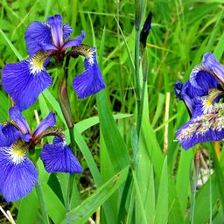

In [22]:
data[0]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(224, 224, 3)

In [25]:
#converting to numpy aaray
X = np.array(data) / 255
y = np.array(labels)

In [26]:
# print(X)

In [27]:
type(X)

numpy.ndarray

In [28]:
X.shape

(421, 224, 224, 3)

In [29]:
y.shape

(421,)

In [30]:
#shuffling the image for better training
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]


In [31]:
print("Before:", y[:10])
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]
print("After :", y[:10])


Before: [0 1 1 2 1 2 1 2 1 1]
After : [0 1 1 1 2 2 2 1 1 1]


# Split the data into Train, test and validation

In [32]:
n = len(X)
train_end = int(0.8 * n)
val_end   = int(0.9 * n)

In [33]:
X_train = X[:train_end]
X_val   = X[train_end:val_end]
X_test  = X[val_end:]

In [34]:
y_train = y[:train_end]
y_val   = y[train_end:val_end]
y_test  = y[val_end:]

In [35]:
print("Train:", X_train.shape)
print("Val  :", X_val.shape)
print("Test :", X_test.shape)


Train: (336, 224, 224, 3)
Val  : (42, 224, 224, 3)
Test : (43, 224, 224, 3)


# Building the CNN model

In [36]:
num_of_Classes = 3
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_of_Classes, activation="sigmoid")   # 3 classes
])

In [37]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 635ms/step - acc: 0.4121 - loss: 1.8369 - val_acc: 0.6190 - val_loss: 0.8955
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - acc: 0.6349 - loss: 0.9255 - val_acc: 0.6190 - val_loss: 0.8909
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - acc: 0.6335 - loss: 0.8766 - val_acc: 0.6190 - val_loss: 0.9082
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - acc: 0.6720 - loss: 0.7986 - val_acc: 0.6190 - val_loss: 0.9704
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - acc: 0.6761 - loss: 0.7798 - val_acc: 0.5952 - val_loss: 0.9003
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - acc: 0.7327 - loss: 0.6899 - val_acc: 0.5952 - val_loss: 0.9748
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - acc: 0.7554 - loss: 0.5631 - val_acc: 0.5952 - val_loss: 0.9303
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - acc: 0.7908 - loss: 0.5549 - val_acc: 0.6190 - val_loss: 1.2735
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - acc: 0.82

# Model Evaluation

In [39]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step - acc: 0.6269 - loss: 2.0378
Test Accuracy = 0.6279069781303406


In [41]:
# pred = np.argmax(model.predict(X_val), axis=1)
# print(confusion_matrix(y_val, pred))
# print(classification_report(y_val, pred))

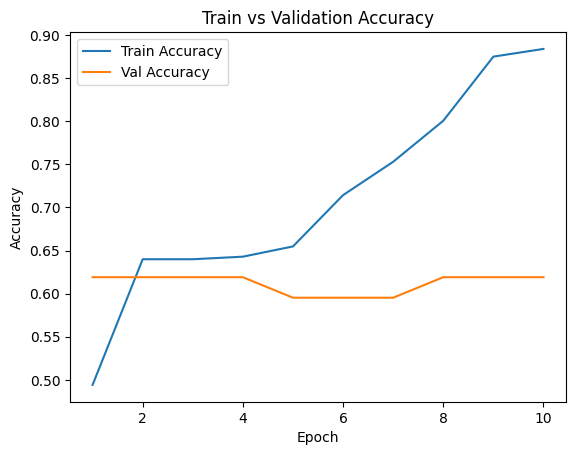

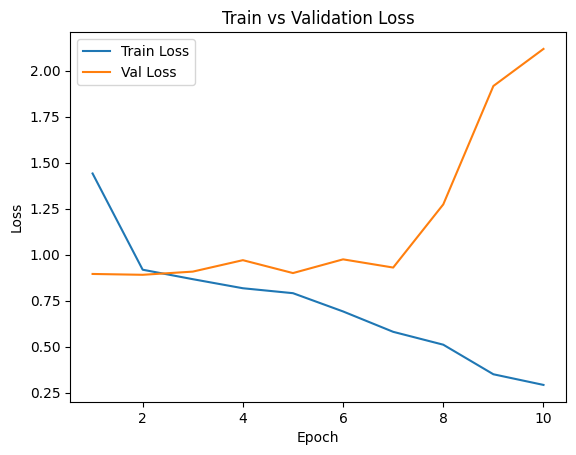

In [45]:
hist = history.history
epochs = range(1, len(hist["loss"]) + 1)

# Accuracy
plt.figure()
plt.plot(epochs, hist["acc"], label="Train Accuracy")
plt.plot(epochs, hist["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(epochs, hist["loss"], label="Train Loss")
plt.plot(epochs, hist["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()



In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)


Test accuracy: 0.6279069781303406
Test loss: 1.9629168510437012


In [47]:
history.history


{'acc': [0.494047611951828,
  0.6398809552192688,
  0.6398809552192688,
  0.6428571343421936,
  0.6547619104385376,
  0.7142857313156128,
  0.7529761791229248,
  0.800595223903656,
  0.875,
  0.8839285969734192],
 'loss': [1.4413599967956543,
  0.9185309410095215,
  0.8671386241912842,
  0.8178587555885315,
  0.7910374999046326,
  0.6917714476585388,
  0.5811061263084412,
  0.5111427903175354,
  0.3504978120326996,
  0.29263004660606384],
 'val_acc': [0.6190476417541504,
  0.6190476417541504,
  0.6190476417541504,
  0.6190476417541504,
  0.5952380895614624,
  0.5952380895614624,
  0.5952380895614624,
  0.6190476417541504,
  0.6190476417541504,
  0.6190476417541504],
 'val_loss': [0.8954939246177673,
  0.8908979296684265,
  0.9081979393959045,
  0.9703684449195862,
  0.9002822637557983,
  0.9748417139053345,
  0.9302928447723389,
  1.2734615802764893,
  1.916592001914978,
  2.1180660724639893]}

# model is showing worse in test
now i am going to add data augmentation

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2,
    stratify=y
)


In [56]:
print(X.shape,X_train.shape, X_test.shape)

(421, 224, 224, 3) (336, 224, 224, 3) (85, 224, 224, 3)


In [61]:
num_of_classes = 3

model = keras.Sequential()

# input: 224x224 RGB (because you resized to 224)
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# 3-class classification -> softmax (not sigmoid)
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

# compile (works with labels 0,1,2)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# compile the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [63]:
#training the neural network
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 567ms/step - acc: 0.4240 - loss: 5.0632 - val_acc: 0.6765 - val_loss: 1.0460
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - acc: 0.5549 - loss: 1.0407 - val_acc: 0.6765 - val_loss: 0.8890
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.6287 - loss: 0.8679 - val_acc: 0.6765 - val_loss: 0.8777
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.6921 - loss: 0.7403 - val_acc: 0.6765 - val_loss: 0.8986
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.7704 - loss: 0.5769 - val_acc: 0.6765 - val_loss: 0.8866


In [66]:

loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 877ms/step - acc: 0.6438 - loss: 0.8971
Test Accuracy = 0.6235294342041016


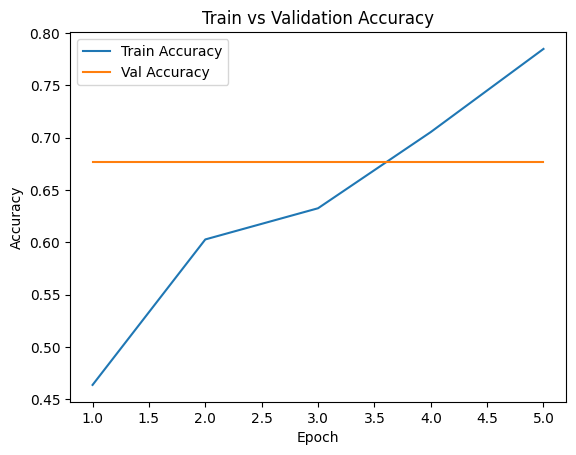

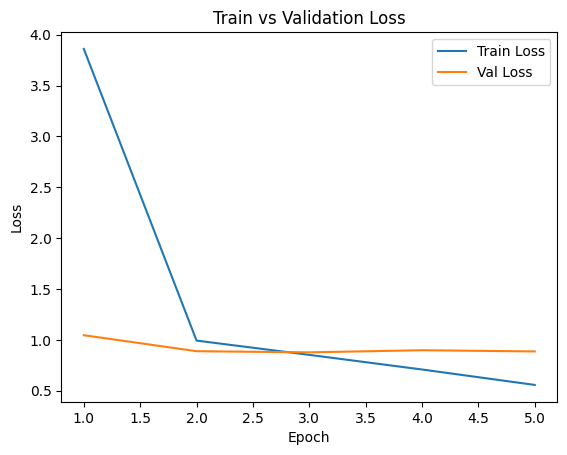

In [67]:
hist = history.history
epochs = range(1, len(hist["loss"]) + 1)

# Accuracy
plt.figure()
plt.plot(epochs, hist["acc"], label="Train Accuracy")
plt.plot(epochs, hist["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(epochs, hist["loss"], label="Train Loss")
plt.plot(epochs, hist["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()



In [68]:
from google.colab import files
# label -> class name
idx_to_class = {
    0: "iris-setosa",
    1: "iris-versicolour",
    2: "iris-virginica"
}

IMG_SIZE = (224, 224)

# Upload an image
uploaded = files.upload()

# Get the uploaded file name
img_path = list(uploaded.keys())[0]

# Load + preprocess
img = Image.open(img_path).convert("RGB")
img = img.resize(IMG_SIZE)
x = np.array(img, dtype=np.float32) / 255.0
x = np.expand_dims(x, axis=0)                 # (1,224,224,3)

# Predict
pred = model.predict(x)
pred_class = int(np.argmax(pred, axis=1)[0])
confidence = float(np.max(pred))

print("Predicted class:", idx_to_class[pred_class])
print("Confidence:", round(confidence * 100, 2), "%")


Saving Untitled.jpeg to Untitled.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
Predicted class: iris-versicolour
Confidence: 85.44 %
